The imdb.tsv dataset comes from the last stage's pre-processing, we simply kept the movies which durations are between 60-180mins, years from 2000-2018.

In this stage we will filter the movies which have too few rating participants.

In [1]:
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.6f' % x)

ratings = pd.read_csv('../imdb.tsv', usecols=[1, 2, 15, 16], delimiter='\t')
print(ratings.describe())

                Budget        Box_Office  Average_Rating     Num_Voters
count      8278.000000       8278.000000     8278.000000    8278.000000
mean   19628420.585528   46170292.887171        6.117130   46583.926432
std    34607441.555051  129418199.971746        1.103026  115192.909952
min         252.000000         13.000000        1.100000       5.000000
25%     1685152.750000     163766.250000        5.500000     649.000000
50%     6000000.000000    2095079.000000        6.200000    4600.000000
75%    20000000.000000   28272793.000000        6.900000   36854.750000
max   321000000.000000 2048359754.000000        9.700000 2111245.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11acd3f50>]],
      dtype=object)

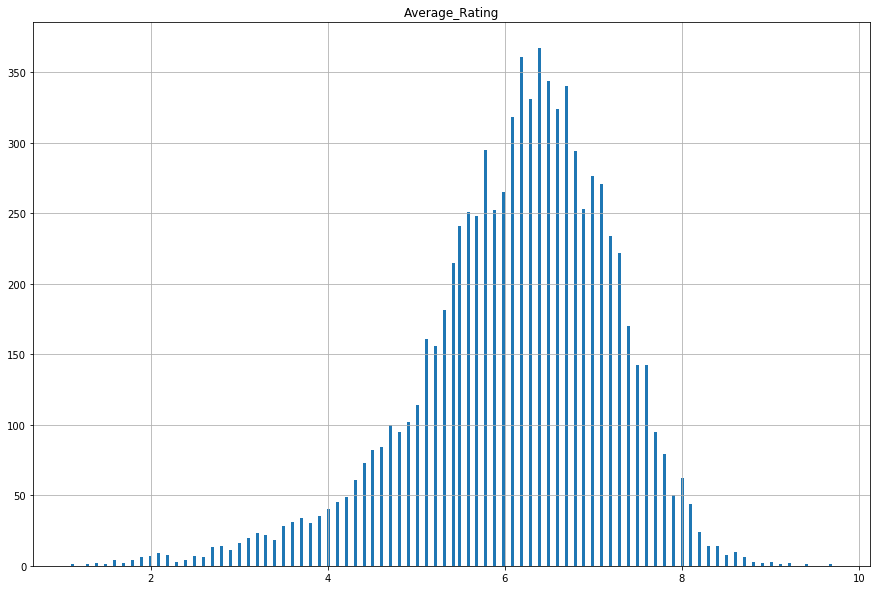

In [3]:
import matplotlib.pyplot as plt

ratings.hist(column="Average_Rating", figsize=(15, 10), bins=256)

Rating distribution looks good.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d0e8250>]],
      dtype=object)

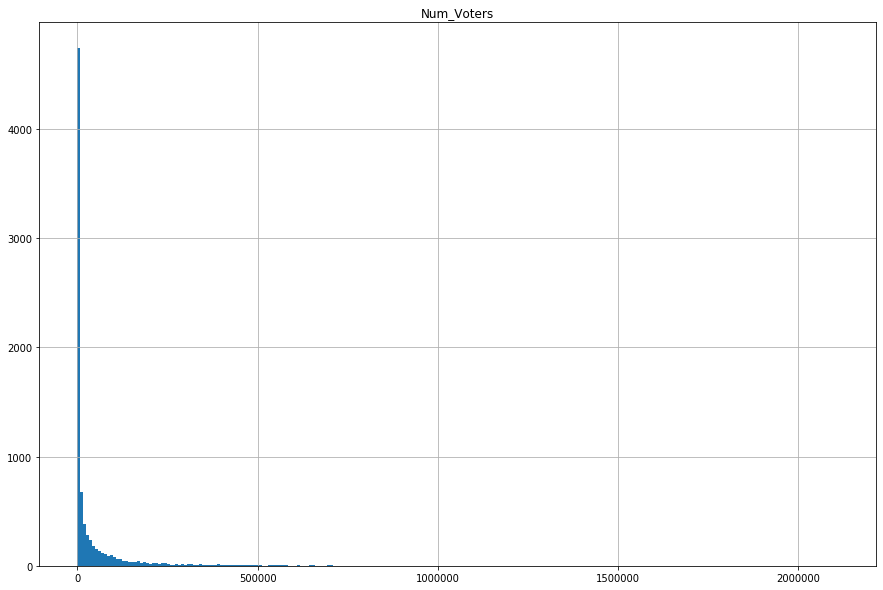

In [5]:
ratings.hist(column="Num_Voters", figsize=(15, 10), bins=256)

But the rating count shows a significant diversity, next try to devide this chart into two parts

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1231d1490>]],
      dtype=object)

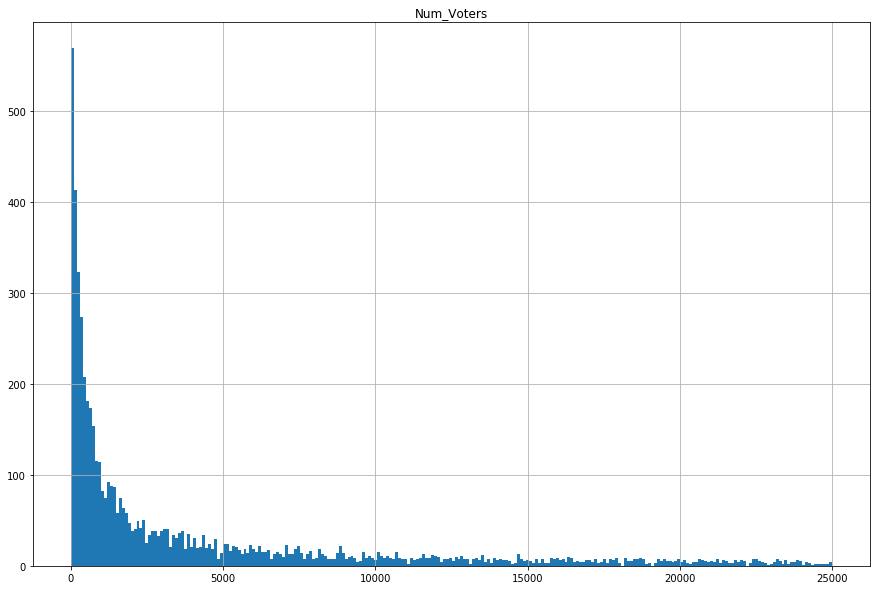

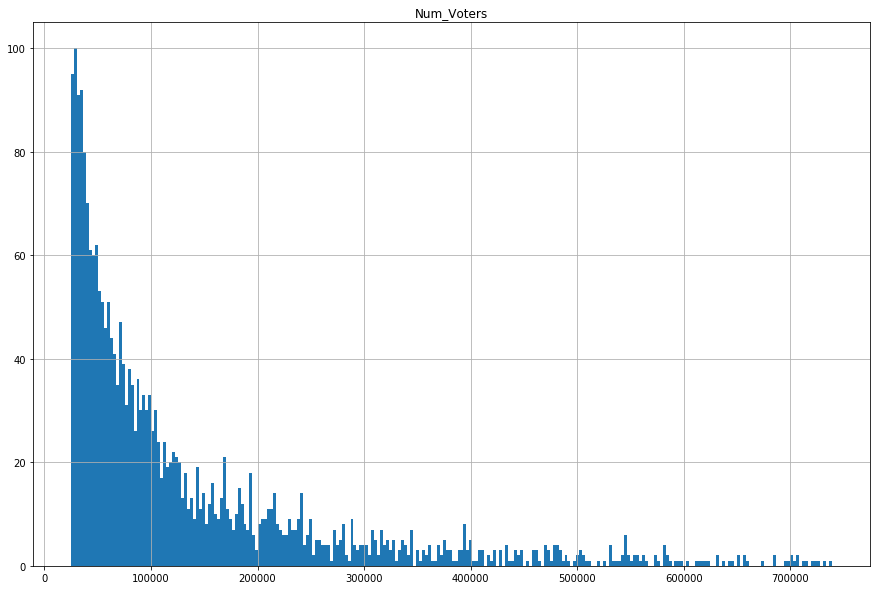

In [20]:
rating_less_than_25000 = ratings[(ratings['Num_Voters']<25000)]
rating_less_than_25000.hist(column="Num_Voters", figsize=(15, 10), bins=256)

rating_more_than_25000 = ratings[(ratings['Num_Voters']>=25000) & (ratings['Num_Voters']<750000)]
rating_more_than_25000.hist(column="Num_Voters", figsize=(15, 10), bins=256)

According to the above chart, we are going to keep the records which rating count>2000.

Now lets have a look at the distribution of box office

In [15]:
cols_data = ratings.values.T
budgets = cols_data[0].tolist()
box_offices = cols_data[1].tolist()
box_offices = sorted(box_offices)


box_offices_part_1 = box_offices[0:1000]
box_offices_part_2 = box_offices[1000:2000]
box_offices_part_3 = box_offices[2000:3000]
box_offices_part_4 = box_offices[3000:4000]
box_offices_part_5 = box_offices[4000:5000]
box_offices_part_6 = box_offices[5000:6000]
box_offices_part_7 = box_offices[6000:7000]
box_offices_part_8 = box_offices[7000:8280]

print('Min: ', min(box_offices_part_1), '-- Max: ', max(box_offices_part_1))
print('Min: ', min(box_offices_part_2), '-- Max: ', max(box_offices_part_2))
print('Min: ', min(box_offices_part_3), '-- Max: ', max(box_offices_part_3))
print('Min: ', min(box_offices_part_4), '-- Max: ', max(box_offices_part_4))
print('Min: ', min(box_offices_part_5), '-- Max: ', max(box_offices_part_5))
print('Min: ', min(box_offices_part_6), '-- Max: ', max(box_offices_part_6))
print('Min: ', min(box_offices_part_7), '-- Max: ', max(box_offices_part_7))
print('Min: ', min(box_offices_part_8), '-- Max: ', max(box_offices_part_8))

Min:  13.0 -- Max:  25116.0
Min:  25158.0 -- Max:  148995.0
Min:  149118.0 -- Max:  558764.0
Min:  559555.0 -- Max:  1775619.0
Min:  1780020.0 -- Max:  6200970.0
Min:  6201250.0 -- Max:  21947209.0
Min:  21949214.0 -- Max:  70099445.0
Min:  70181428.0 -- Max:  2048359754.0
